In [106]:
from RCN import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# calibrated parameters
r = -0.007801729853464256
delta = 0.02720239796079839
U = 1.054699999999994
D = 0.9440001342869291

### 1)
#### i)

In [5]:
payment_dates = np.arange(1,13)
period_length = 1/12
coupon_rate = 0.10
initial_price = 11118
exercise_price = 1

In [6]:
rcn1 = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, exercise_price, Simple=True, Callable=False, barrier_level=None)

In [10]:
rcn1.price_RCN()

1.0124083511877382

#### ii)

In [12]:
barrier_level = 0.8
rcn2 = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)

In [16]:
rcn2.set_barrier()
rcn2.price_RCN()

1.0544990135271406

### 2)

In [41]:
par_rate1 = 0
rcn1_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate1, exercise_price, Simple=True, Callable=False, barrier_level=None)
while np.abs(rcn1_par.price_RCN() - 1) > .001:
    par_rate1 += .001
    rcn1_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                           payment_dates, par_rate1, exercise_price, Simple=True, Callable=False, barrier_level=None)

In [52]:
par_rate1

0.08700000000000006

In [49]:
round(rcn1_par.price_RCN(),2)

1.0

In [43]:
par_rate2 = 0
rcn2_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate2, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)
rcn2_par.set_barrier()
while np.abs(rcn2_par.price_RCN() - 1) > .001:
    par_rate2 += .001
    rcn2_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate2, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)
    rcn2_par.set_barrier()

In [53]:
par_rate2

0.04500000000000003

In [51]:
round(rc2_par.price_RCN(),2)

1.0

In [62]:
barrier_levels = np.arange(.4,1.2,.2)
strikes = np.linspace(.5,1.5)

In [64]:
par_simple = []
par_barrier = {}

In [87]:
for s in strikes:
    par = -.10
    simple = RCN_binomial(r, period_length, initial_price, delta, U, D,
                          payment_dates, par, s, Simple=True, Callable=False, barrier_level=None)
    while np.abs(simple.price_RCN() - 1) > .001:
        par += .001
        simple = RCN_binomial(r, period_length, initial_price, delta, U, D,
                              payment_dates, par, s, Simple=True, Callable=False, barrier_level=None)
    par_simple.append(par)

In [104]:
for b in barrier_levels:
    for s in strikes:
        print(b,s)
        par = -.10
        barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,
                  payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)
        barrier.set_barrier()
        while np.abs(barrier.price_RCN() - 1) > .001:
            par += .001
            barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,
                      payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)
            barrier.set_barrier()
        if s == strikes[0]:
            par_barrier[b] = [par]
        else:
            par_barrier[b].append(par)

0.4 0.5
0.4 0.5204081632653061
0.4 0.5408163265306123
0.4 0.5612244897959183
0.4 0.5816326530612245
0.4 0.6020408163265306
0.4 0.6224489795918368
0.4 0.6428571428571428
0.4 0.6632653061224489
0.4 0.6836734693877551
0.4 0.7040816326530612
0.4 0.7244897959183674
0.4 0.7448979591836735
0.4 0.7653061224489796
0.4 0.7857142857142857
0.4 0.8061224489795917
0.4 0.8265306122448979
0.4 0.846938775510204
0.4 0.8673469387755102
0.4 0.8877551020408163
0.4 0.9081632653061225
0.4 0.9285714285714286
0.4 0.9489795918367346
0.4 0.9693877551020408
0.4 0.9897959183673469
0.4 1.010204081632653
0.4 1.030612244897959
0.4 1.0510204081632653
0.4 1.0714285714285714
0.4 1.0918367346938775
0.4 1.1122448979591835
0.4 1.1326530612244898
0.4 1.1530612244897958
0.4 1.1734693877551021
0.4 1.193877551020408
0.4 1.2142857142857142
0.4 1.2346938775510203
0.4 1.2551020408163265
0.4 1.2755102040816326
0.4 1.2959183673469385
0.4 1.316326530612245
0.4 1.3367346938775508
0.4 1.3571428571428572
0.4 1.3775510204081631
0.4 1.39

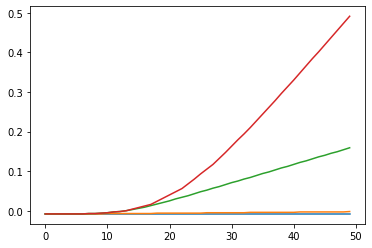

In [115]:
for i in range(len(par_barrier)):
    plt.plot(par_barrier[barrier_levels[i]])

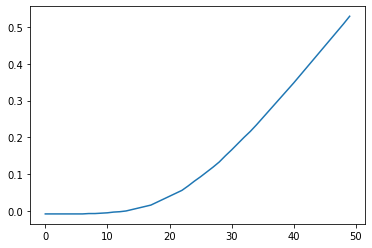

In [116]:
plt.plot(par_simple)